<a href="https://colab.research.google.com/github/Mobious96/matstat/blob/master/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
Heart Disease UCI

In [0]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
data = pd.read_csv('heart.csv', sep = ',')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Описание
1. age  
2. sex - (0:f, 1:m)
3. сp (chest pain type)  
Value 1: typical angina  
Value 2: atypical angina  
Value 3: non-anginal pain  
Value 4: asymptomatic  
4. trestbps (resting blood pressure (in mm Hg on admission to the hospital))
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal (Thalium Stress Test Result)  
1 = fixed defect; 2 = normal; 7 = reversable defect
14. target  
0 -> no heart disease
1 -> heart disease  
https://www.kaggle.com/ronitf/heart-disease-uci

In [0]:
data.shape
#Размерность данных

(303, 14)

In [0]:
data.columns
#Названия столбцов

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


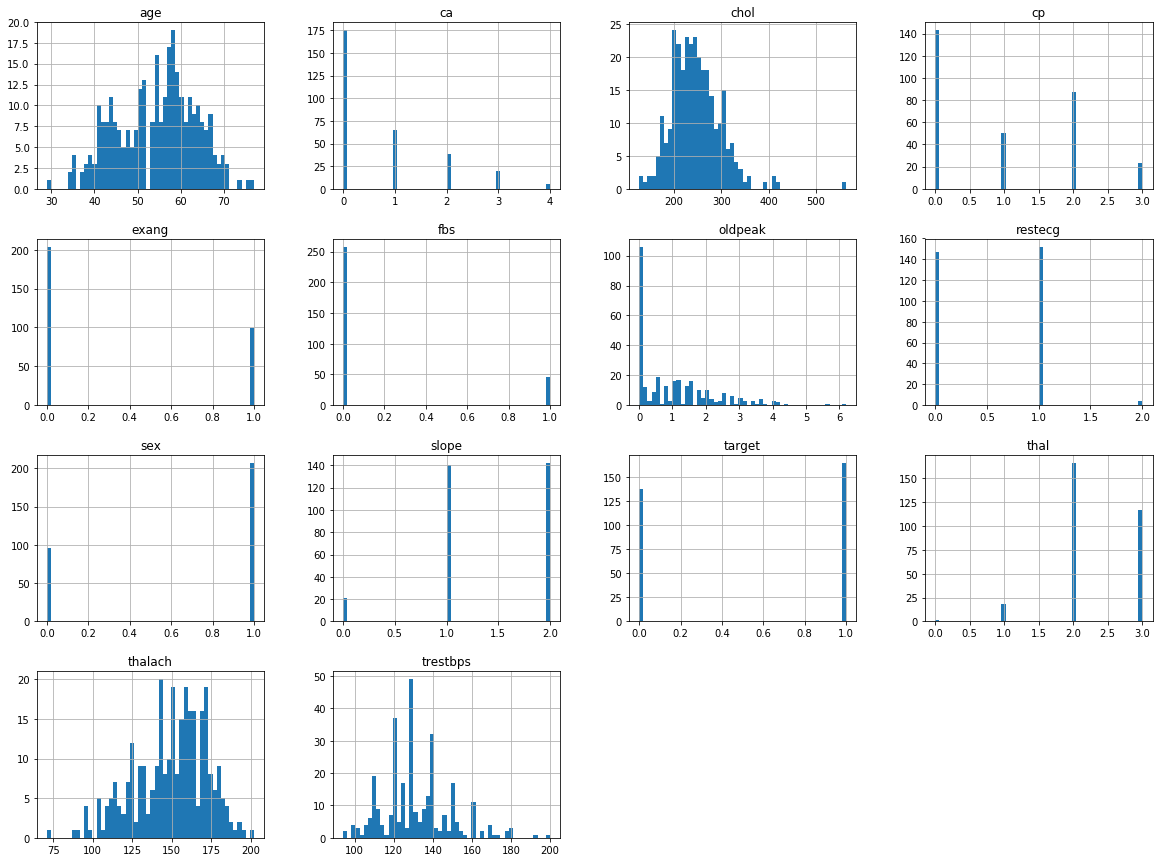

In [0]:
data.hist(bins=50, figsize=(20,15))
plt.show()
#Просмотр данных

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


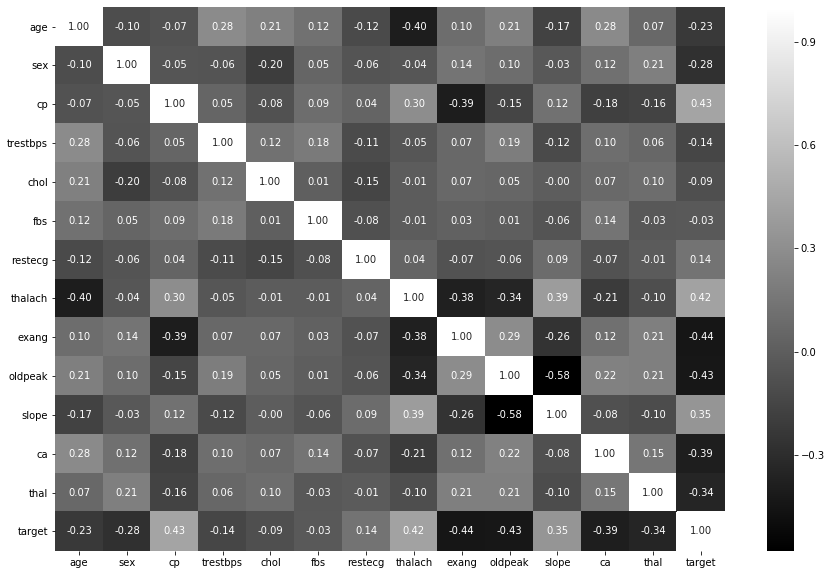

In [5]:
import seaborn
corr_matrix = data.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=plt.cm.gray)
plt.show()
#Матрица ковариации

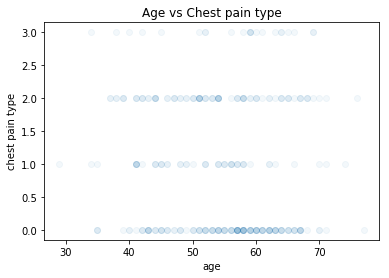

In [0]:
plt.plot(data[data.columns[0]], data['cp'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('chest pain type')
plt.title('Age vs Chest pain type')
pass

In [0]:
data["age"].unique()
#age

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

# Готовим данные

In [6]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


Все данные числовые

In [7]:
data[numerical_columns].count(axis = 0)

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

Пропусков в полях нет

In [8]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# X и y

In [0]:
X = data.drop(('target'), axis = 1) # выбрасываем столбец 'target' (имеет болезнь/нет)
y = data['target']
feature_names = X.columns

In [10]:
type(feature_names)

pandas.core.indexes.base.Index

In [11]:
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [0]:
X.shape

(303, 13)

In [0]:
y.shape

(303,)

In [0]:
# Разобьем данные на тренировочную и тестовую части
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

212 91


In [0]:
X_train.shape

(212, 13)

In [0]:
X_test.shape

(91, 13)

# kNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.30660377358490565 0.3076923076923077


# AdaBoost

In [0]:
from sklearn import ensemble
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0 0.21978021978021978


# Часть 2

### Подбор параметров для kNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Меньшая ошибка " + str(best_cv_err))
print("Число соседей " + str(best_n_neighbors))

Меньшая ошибка 0.33490566037735847
Число соседей 5


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)
# Несмотря на лучшие результаты параметра, равным 7, по тестовой выборке, на тренировочной результаты хуже. 
# Будем предполагать, что оптимальное значение = 5.

0.25471698113207547 0.32967032967032966


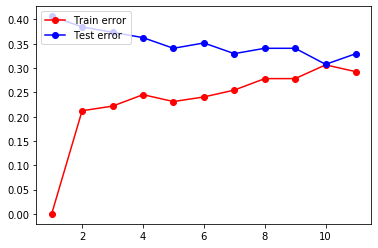

In [0]:
ran_k = range(1, 12)
err_train_mas = []
err_test_mas = []
for k in ran_k:
    mod_k = KNeighborsClassifier(n_neighbors = k)
    mod_k.fit(X_train, y_train)
    err_train_mas.append(np.mean(mod_k.predict(X_train) != y_train))
    err_test_mas.append(np.mean(mod_k.predict(X_test) != y_test))
plt.plot(ran_k, err_train_mas, 'r-o', label = 'Train error')
plt.plot(ran_k, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)

На графике видно, что k=7 имеет меньшую ошибку на тестовой выборке, но большую на тренировочной. Пусть k=5 - оптимально.

### PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)
X_PCA

array([[-1.22673448e+01,  2.87383781e+00],
       [ 2.69013712e+00, -3.98713736e+01],
       [-4.29502141e+01, -2.36368199e+01],
       [-1.09447564e+01, -2.84380358e+01],
       [ 1.06979053e+02, -1.58744678e+01],
       [-5.36472038e+01,  4.00392377e+00],
       [ 4.80821551e+01, -3.03896086e+00],
       [ 1.55660590e+01, -2.62745637e+01],
       [-4.54388962e+01, -7.42977739e+00],
       [-7.73163161e+01, -1.99100759e+01],
       [-6.94323738e+00, -9.17536374e+00],
       [ 2.84259379e+01,  8.47126467e+00],
       [ 1.92477377e+01, -2.24212575e+01],
       [-3.58055558e+01,  5.70343964e+00],
       [ 3.75886896e+01, -1.02579437e+01],
       [-2.79998518e+01, -9.64570379e+00],
       [ 9.29750393e+01, -2.42584272e+01],
       [-1.86307973e+01,  3.92597411e+01],
       [ 1.00245407e+00, -2.10404091e+01],
       [-6.28419048e+00,  2.34469473e+00],
       [-1.19811457e+01, -9.66308502e+00],
       [-1.39453649e+01, -3.05172542e+01],
       [-2.05255102e+01, -2.87200024e+01],
       [-2.

Text(0.5, 1.0, 'components')

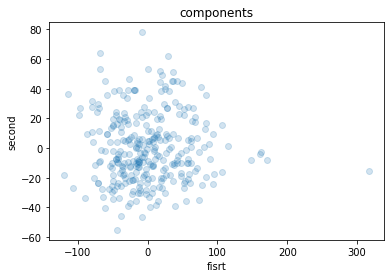

In [0]:
plt.scatter(X_PCA[:,0], X_PCA[:,1], alpha = .2)

plt.xlabel('fisrt')
plt.ylabel('second')
plt.title('components')

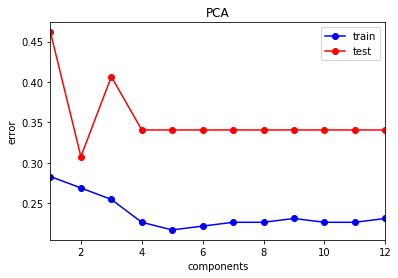

In [0]:
components_arr = np.arange(1, 13) #X.shape(..,13)
test_err = []
train_err = []

for components in components_arr:
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
    knn.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != knn.predict(X_train)))
    test_err.append(np.mean(y_test  != knn.predict(X_test)))
    

plt.figure()
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
plt.show()

In [0]:
np.min(test_err)

0.3076923076923077

PCA позволил увеличить точность на 3%

In [0]:
for i in range(7):
    print("Count components: " , i + 1, "Error for test sample: " , test_err[i])

Count components:  1 Error for test sample:  0.46153846153846156
Count components:  2 Error for test sample:  0.3076923076923077
Count components:  3 Error for test sample:  0.4065934065934066
Count components:  4 Error for test sample:  0.34065934065934067
Count components:  5 Error for test sample:  0.34065934065934067
Count components:  6 Error for test sample:  0.34065934065934067
Count components:  7 Error for test sample:  0.34065934065934067


Попробуем для k=7

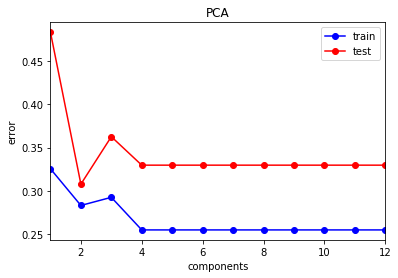

In [0]:
components_arr = np.arange(1, 13) #X.shape(..,13)
test_err = []
train_err = []

for components in components_arr:
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != knn.predict(X_train)))
    test_err.append(np.mean(y_test  != knn.predict(X_test)))
    

plt.figure()
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
plt.show()

In [0]:
for i in range(7):
    print("Count components: " , i + 1, "Error for test sample: " , test_err[i])

Count components:  1 Error for test sample:  0.4835164835164835
Count components:  2 Error for test sample:  0.3076923076923077
Count components:  3 Error for test sample:  0.3626373626373626
Count components:  4 Error for test sample:  0.32967032967032966
Count components:  5 Error for test sample:  0.32967032967032966
Count components:  6 Error for test sample:  0.32967032967032966
Count components:  7 Error for test sample:  0.32967032967032966


Вывод: метод главных компонент позволил уменьшить ошибку приблизительно на 3% при числе главных компонент равным 2.

# Часть 3
Обучение неглубокой полносвязной нейронной сети

Разбиваем данные на тестовую и тренировочную выборки

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

In [0]:
from sklearn.neural_network import MLPClassifier

Обучаем нейронную сесть с функцией активации Релу

In [65]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
mlp_model.n_layers_
# 1 входной, 1 скрытый, 1 выход

3

In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [67]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.7931034482758621 0.62


In [68]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,2), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.7389162561576355 0.72


Точность составляет 48% на тестовой выборке. При добавлении еще одного слоя - точность увеличивается. Давайте подбирать оптимальные параметры

## Подбор гиперпараметров

 ### Подбор параметра регуляризации alpha

In [0]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

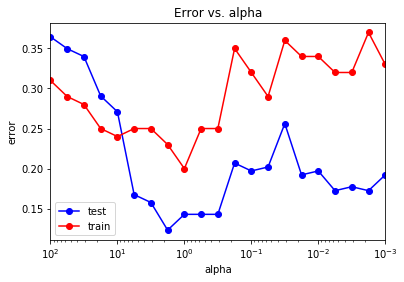

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

 Видим, что при больших alpha наблюдается переобучение. При альфа = 13, ошибка на тестовой выборке ~12%, а при альфа = 13 ~15%.

 Минимальное значение ошибки:

In [57]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.5566502463054187 0.52


In [54]:
print(np.argmin(test_err), np.argmin(train_err))

12 13


In [49]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.]


In [50]:
alpha_opt = alpha_opt[0]
print(alpha_opt)

1.0


In [77]:
mlp_model = MLPClassifier(alpha = 12, hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.7241379310344828 0.75


In [78]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.8571428571428571 0.8


Смогли увеличить точность на 18% (пред. результат - 62%)

### Подборка параметра числа нейронов

In [0]:
nodes_arr = np.arange(10, 100, 5)
test_err = []
train_err = []
for nodes in nodes_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (nodes,), solver = 'lbfgs',
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

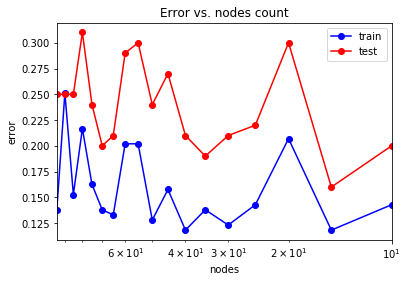

In [96]:
plt.semilogx(nodes_arr, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(nodes_arr), np.min(nodes_arr)])
plt.title('Error vs. nodes count')
plt.xlabel('nodes')
plt.ylabel('error')
plt.legend()

In [97]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.11822660098522167 0.16


In [99]:
print(np.argmin(test_err), np.argmin(train_err))

1 1


In [100]:
nodes_opt = nodes_arr[test_err == min_test_err][0]
print(nodes_opt)

15


In [101]:
nodes_arr[nodes_opt]

85

In [111]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (nodes_opt,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.8817733990147784 0.84


Увеличили точность на тестовой выборке еще на 4% благодаря нахождению оптимального числа нейронов в слое (85 нейронов).

## Random Forest

In [112]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
# Считаем среднюю ошибку
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.21


Построим график зависимости ошибки на обучающей и тестовой выборках,а также out-of-bag ошибки (oob-ошибки) от количества деревьев.

In [0]:
trees_arr = np.arange(25, 126, 5)
test_err = []
train_err = []
oob_err = []
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = trees, oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1 - rf.oob_score_)

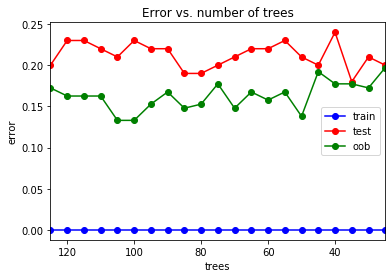

In [115]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()

## Gradient Boosted Trees

Наблюдается переобучение при любых параметрах

In [121]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))
print(err_train, err_test)

0.0 0.22


Построим график зависимости ошибки на обучающей и тестовой выборках,а также out-of-bag ошибки (oob-ошибки) от количества деревьев.

In [0]:
trees_arr = np.arange(5, 126, 5)
test_err = []
train_err = []
for trees in trees_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))

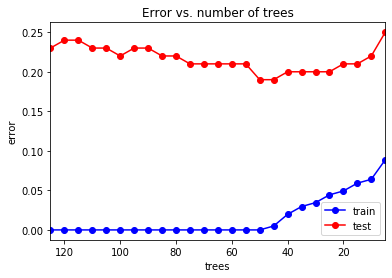

In [120]:
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(trees_arr), np.min(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()

Снова наблюдается сильное переобучение

## Выводы

На текующих данных удалость минимизировать ошибку, используя метод k ближайших соседенй после применения метода главных компонент (2 комп. точность 67%). Применив PCA, увеличили точность до 70%. Методы random forest, gbt дали точносьт в 78%. Самый лучший результат показала сеть, состоящая из 1 полносвязного слоя из 85 нейронов и альфа = 1 (84% точности).